In [1]:
import pandas as pd
import numpy as np
import tensorflow_decision_forests as tfdf

2024-09-12 19:34:17.280569: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-12 19:34:17.621553: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-12 19:34:21.416629: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-12 19:34:24.754135: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-12 19:34:27.759276: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
train_df = pd.read_csv("resources/train.csv")
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_df.info()
set(train_df.dtypes.to_list())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

{dtype('int64'), dtype('float64'), dtype('O')}

<Axes: >

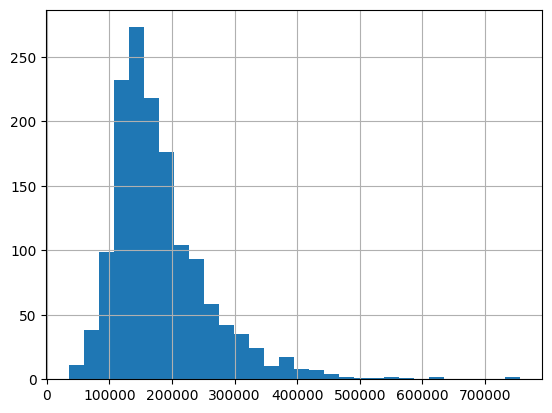

In [4]:
train_df['SalePrice'].hist(bins=30)

In [5]:
# defined evaluation metric is RMSE between the logarithm of the predicted value and the logarithm of the observed sales price
train_df['SalePriceLog'] = np.log(train_df['SalePrice'])

train_df.drop(columns=['Id', 'SalePrice'], inplace=True)
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePriceLog
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849398
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429216


<Axes: >

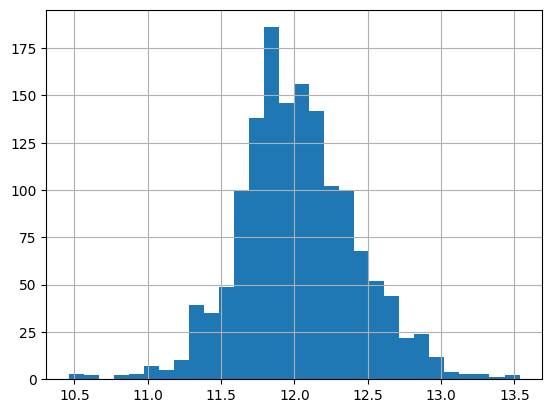

In [6]:
train_df['SalePriceLog'].hist(bins=30)

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

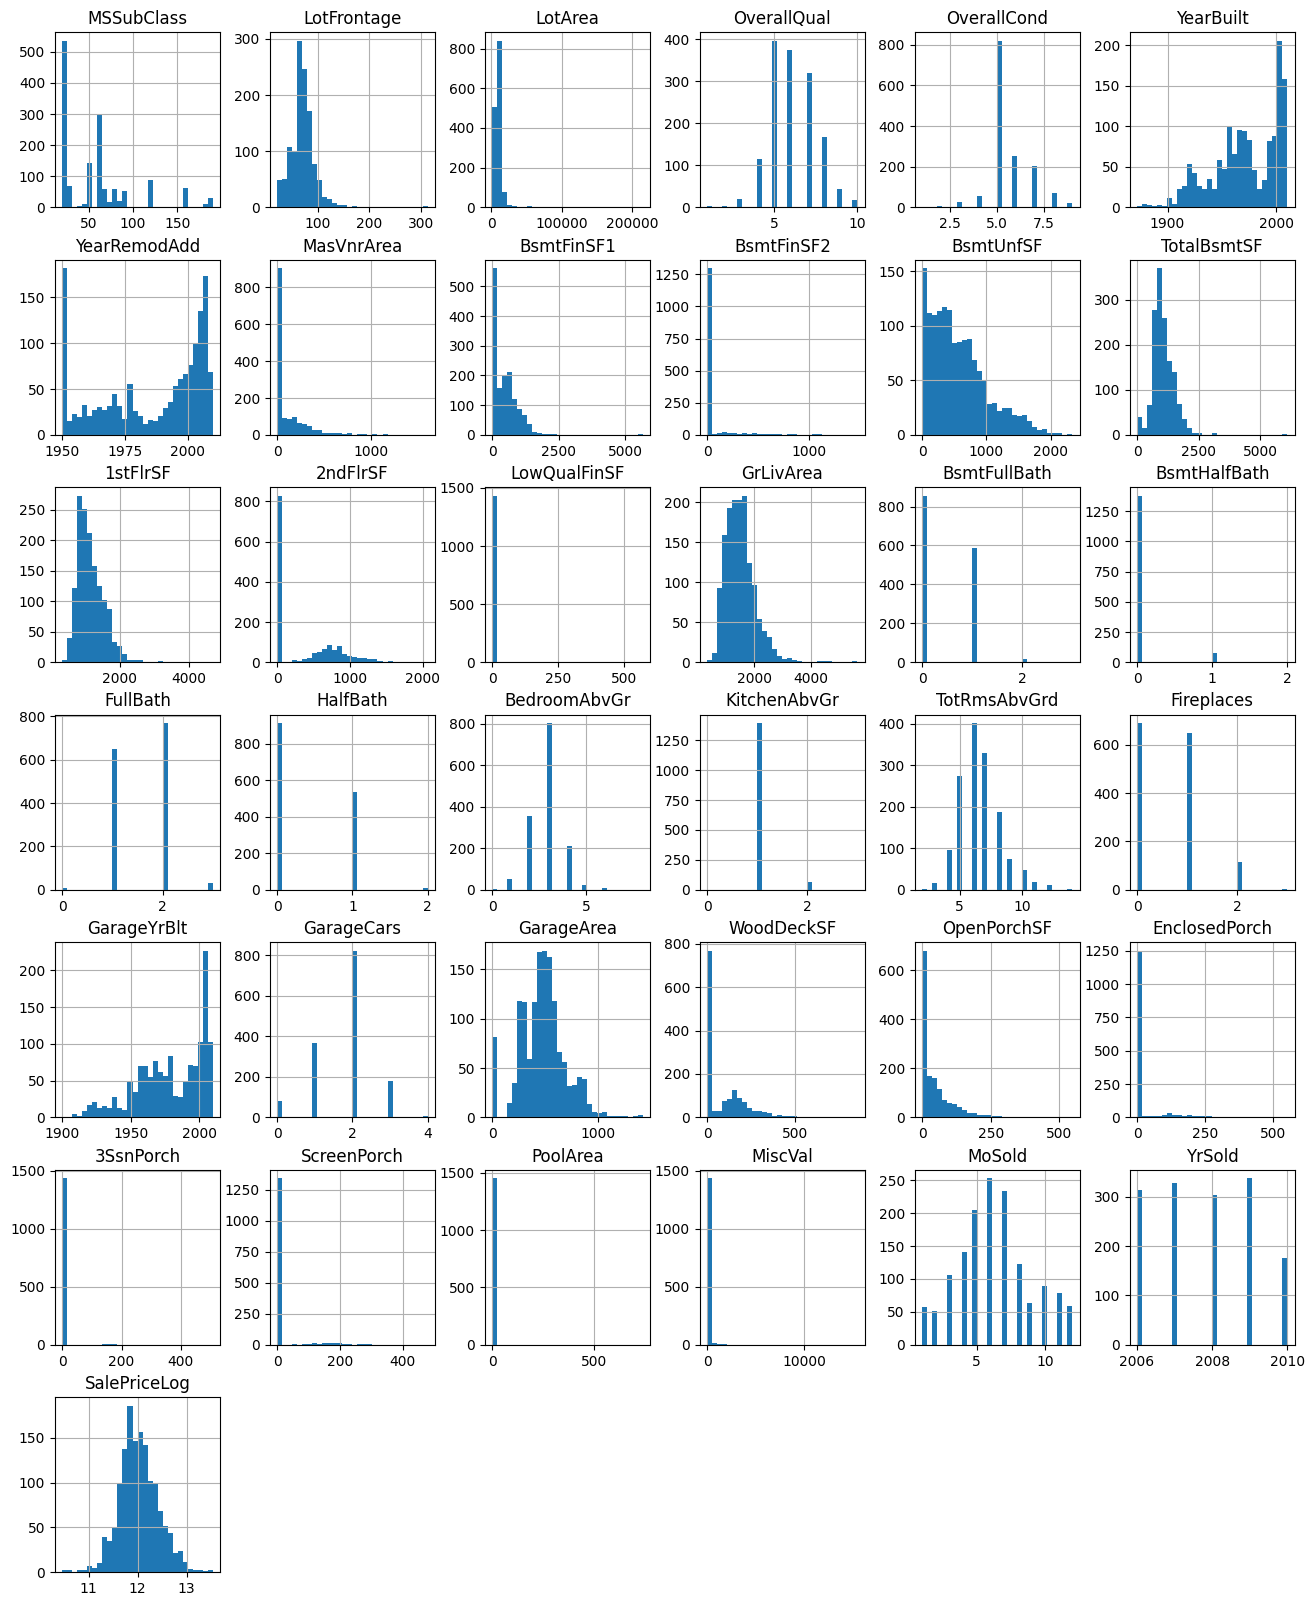

In [7]:
train_df.select_dtypes(include = ['float64', 'int64']).hist(figsize=(16,20), bins=30)

In [8]:
# let's try out a default random forest regression model
rf_model = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION)
rf_model.compile(metrics=['mse'])
rf_model.fit(tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label='SalePriceLog', task=tfdf.keras.Task.REGRESSION))

Use /tmp/tmpxprcy15t as temporary training directory
Reading training dataset...
Training dataset read in 0:00:06.801736. Found 1460 examples.
Training model...


I0000 00:00:1726162637.628409     857 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1726162637.631708     857 kernel.cc:775] Collect training examples
I0000 00:00:1726162637.631738     857 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1726162637.632369     857 kernel.cc:394] Number of batches: 2
I0000 00:00:1726162637.632425     857 kernel.cc:395] Number of examples: 1460
I0000 00:00:1726162637.634689     857 data_spec_inference.cc:306] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1726162637.634794     857 data_spec_inference.cc:306] 1 item(s) have been prun

Model trained in 0:00:02.035447
Compiling model...


I0000 00:00:1726162639.610452     857 decision_forest.cc:761] Model loaded with 300 root(s), 138332 node(s), and 75 input feature(s).
I0000 00:00:1726162639.613921     857 abstract_model.cc:1323] Engine "RandomForestOptPred" built
2024-09-12 19:37:19.613992: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model compiled.


In [9]:
rf_model.summary()
# the oob evaluation is 0.134416, which I think isn't too bad given that the values of log(SalePrice) are between 10 and 13

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: REGRESSION
Label: "__LABEL"

Input Features (79):
	1stFlrSF
	2ndFlrSF
	3SsnPorch
	Alley
	BedroomAbvGr
	BldgType
	BsmtCond
	BsmtExposure
	BsmtFinSF1
	BsmtFinSF2
	BsmtFinType1
	BsmtFinType2
	BsmtFullBath
	BsmtHalfBath
	BsmtQual
	BsmtUnfSF
	CentralAir
	Condition1
	Condition2
	Electrical
	EnclosedPorch
	ExterCond
	ExterQual
	Exterior1st
	Exterior2nd
	Fence
	FireplaceQu
	Fireplaces
	Foundation
	FullBath
	Functional
	GarageArea
	GarageCars
	GarageCond
	GarageFinish
	GarageQual
	GarageType
	GarageYrBlt
	GrLivArea
	HalfBath
	Heating
	HeatingQC
	HouseStyle
	KitchenAbvGr
	KitchenQual
	LandContour
	LandSlope
	LotArea
	LotConfig
	LotFrontage
	LotShape
	

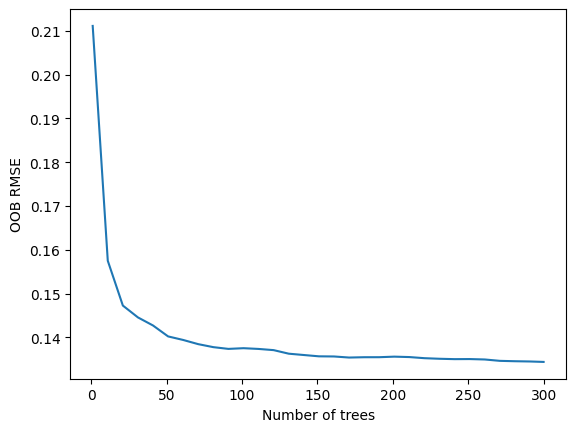

In [10]:
import matplotlib.pyplot as plt 
logs = rf_model.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("OOB RMSE")
plt.show()

In [11]:
# let's tweak the number of features to consider for each tree
num_input_features = train_df.shape[1] - 1
print(num_input_features)
print(round(np.sqrt(num_input_features))) # the default value

79
9


In [12]:
# let's try a few values below and above the default value 9
oob_evals = {}
for num_feat in list(range(7,20)):
  rf_model = tfdf.keras.RandomForestModel(
    task=tfdf.keras.Task.REGRESSION, 
    num_candidate_attributes=num_feat
    )
  rf_model.compile(metrics=['mse'])
  rf_model.fit(tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label='SalePriceLog', task=tfdf.keras.Task.REGRESSION))
  
  final_oob_eval = rf_model.make_inspector().evaluation().to_dict()['rmse']
  oob_evals[num_feat] = final_oob_eval

Use /tmp/tmpf68c9aj3 as temporary training directory


Reading training dataset...
Training dataset read in 0:00:02.746132. Found 1460 examples.
Training model...


I0000 00:00:1726162645.597876     857 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1726162645.597947     857 kernel.cc:775] Collect training examples
I0000 00:00:1726162645.597967     857 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1726162645.598653     857 kernel.cc:394] Number of batches: 2
I0000 00:00:1726162645.598698     857 kernel.cc:395] Number of examples: 1460
I0000 00:00:1726162645.601279     857 data_spec_inference.cc:306] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1726162645.601388     857 data_spec_inference.cc:306] 1 item(s) have been prun

Model trained in 0:00:01.127726
Compiling model...


I0000 00:00:1726162646.694132     857 decision_forest.cc:761] Model loaded with 300 root(s), 137484 node(s), and 75 input feature(s).
2024-09-12 19:37:26.694603: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model compiled.
Use /tmp/tmpllgp0hok as temporary training directory
Reading training dataset...
Training dataset read in 0:00:02.293551. Found 1460 examples.
Training model...


I0000 00:00:1726162650.526186     857 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1726162650.526262     857 kernel.cc:775] Collect training examples
I0000 00:00:1726162650.526281     857 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1726162650.526615     857 kernel.cc:394] Number of batches: 2
I0000 00:00:1726162650.526651     857 kernel.cc:395] Number of examples: 1460
I0000 00:00:1726162650.528847     857 data_spec_inference.cc:306] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1726162650.528913     857 data_spec_inference.cc:306] 1 item(s) have been prun

Model trained in 0:00:01.287448
Compiling model...


I0000 00:00:1726162651.785256     857 decision_forest.cc:761] Model loaded with 300 root(s), 137674 node(s), and 75 input feature(s).
I0000 00:00:1726162651.785360     857 abstract_model.cc:1323] Engine "RandomForestOptPred" built
2024-09-12 19:37:31.785387: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model compiled.
Use /tmp/tmp7tejg5g_ as temporary training directory
Reading training dataset...
Training dataset read in 0:00:02.368086. Found 1460 examples.
Training model...


I0000 00:00:1726162655.831993     857 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1726162655.832058     857 kernel.cc:775] Collect training examples
I0000 00:00:1726162655.832074     857 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1726162655.832290     857 kernel.cc:394] Number of batches: 2
I0000 00:00:1726162655.832296     857 kernel.cc:395] Number of examples: 1460
I0000 00:00:1726162655.835320     857 data_spec_inference.cc:306] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1726162655.835430     857 data_spec_inference.cc:306] 1 item(s) have been prun

Model trained in 0:00:01.049239
Compiling model...


I0000 00:00:1726162656.851872     857 decision_forest.cc:761] Model loaded with 300 root(s), 138024 node(s), and 76 input feature(s).
2024-09-12 19:37:36.852761: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model compiled.
Use /tmp/tmpn9l_fa07 as temporary training directory
Reading training dataset...


Training dataset read in 0:00:02.577305. Found 1460 examples.
Training model...


I0000 00:00:1726162660.916652     857 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1726162660.916741     857 kernel.cc:775] Collect training examples
I0000 00:00:1726162660.916797     857 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1726162660.917124     857 kernel.cc:394] Number of batches: 2
I0000 00:00:1726162660.917139     857 kernel.cc:395] Number of examples: 1460
I0000 00:00:1726162660.920398     857 data_spec_inference.cc:306] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1726162660.920483     857 data_spec_inference.cc:306] 1 item(s) have been prun

Model trained in 0:00:01.052202
Compiling model...


I0000 00:00:1726162661.945158     857 decision_forest.cc:761] Model loaded with 300 root(s), 137972 node(s), and 74 input feature(s).
I0000 00:00:1726162661.945243     857 abstract_model.cc:1323] Engine "RandomForestOptPred" built
2024-09-12 19:37:41.945269: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model compiled.


Use /tmp/tmpyo9ww08x as temporary training directory
Reading training dataset...


Training dataset read in 0:00:02.311352. Found 1460 examples.
Training model...


I0000 00:00:1726162665.819235     857 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1726162665.819307     857 kernel.cc:775] Collect training examples
I0000 00:00:1726162665.819350     857 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1726162665.819597     857 kernel.cc:394] Number of batches: 2
I0000 00:00:1726162665.819635     857 kernel.cc:395] Number of examples: 1460
I0000 00:00:1726162665.822088     857 data_spec_inference.cc:306] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1726162665.822197     857 data_spec_inference.cc:306] 1 item(s) have been prun

Model trained in 0:00:01.360656
Compiling model...


I0000 00:00:1726162667.147315     857 decision_forest.cc:761] Model loaded with 300 root(s), 138234 node(s), and 75 input feature(s).
2024-09-12 19:37:47.147445: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model compiled.


Use /tmp/tmpe4gujfdv as temporary training directory
Reading training dataset...
Training dataset read in 0:00:02.345814. Found 1460 examples.
Training model...


I0000 00:00:1726162670.982248     857 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1726162670.982322     857 kernel.cc:775] Collect training examples
I0000 00:00:1726162670.982338     857 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1726162670.982638     857 kernel.cc:394] Number of batches: 2
I0000 00:00:1726162670.982686     857 kernel.cc:395] Number of examples: 1460
I0000 00:00:1726162670.986044     857 data_spec_inference.cc:306] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1726162670.986148     857 data_spec_inference.cc:306] 1 item(s) have been prun

Model trained in 0:00:01.395410
Compiling model...


I0000 00:00:1726162672.352897     857 decision_forest.cc:761] Model loaded with 300 root(s), 137870 node(s), and 75 input feature(s).
I0000 00:00:1726162672.353154     857 abstract_model.cc:1323] Engine "RandomForestOptPred" built
2024-09-12 19:37:52.353201: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model compiled.
Use /tmp/tmpy665kj33 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:02.310086. Found 1460 examples.
Training model...


I0000 00:00:1726162676.288059     857 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1726162676.288116     857 kernel.cc:775] Collect training examples
I0000 00:00:1726162676.288463     857 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1726162676.288765     857 kernel.cc:394] Number of batches: 2
I0000 00:00:1726162676.288804     857 kernel.cc:395] Number of examples: 1460
I0000 00:00:1726162676.291026     857 data_spec_inference.cc:306] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1726162676.291093     857 data_spec_inference.cc:306] 1 item(s) have been prun

Model trained in 0:00:01.202592
Compiling model...


I0000 00:00:1726162677.464173     857 decision_forest.cc:761] Model loaded with 300 root(s), 138086 node(s), and 76 input feature(s).
2024-09-12 19:37:57.464300: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model compiled.
Use /tmp/tmp1mo694py as temporary training directory
Reading training dataset...
Training dataset read in 0:00:02.290337. Found 1460 examples.
Training model...


I0000 00:00:1726162681.525069     857 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1726162681.525136     857 kernel.cc:775] Collect training examples
I0000 00:00:1726162681.525153     857 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1726162681.525399     857 kernel.cc:394] Number of batches: 2
I0000 00:00:1726162681.525405     857 kernel.cc:395] Number of examples: 1460
I0000 00:00:1726162681.527698     857 data_spec_inference.cc:306] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1726162681.527800     857 data_spec_inference.cc:306] 1 item(s) have been prun

Model trained in 0:00:01.210402
Compiling model...


I0000 00:00:1726162682.706461     857 decision_forest.cc:761] Model loaded with 300 root(s), 137962 node(s), and 75 input feature(s).
I0000 00:00:1726162682.706640     857 abstract_model.cc:1323] Engine "RandomForestOptPred" built
2024-09-12 19:38:02.706672: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model compiled.
Use /tmp/tmph8e6raae as temporary training directory
Reading training dataset...
Training dataset read in 0:00:03.501293. Found 1460 examples.
Training model...


I0000 00:00:1726162688.819642     857 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1726162688.819731     857 kernel.cc:775] Collect training examples
I0000 00:00:1726162688.819757     857 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1726162688.820252     857 kernel.cc:394] Number of batches: 2
I0000 00:00:1726162688.820323     857 kernel.cc:395] Number of examples: 1460
I0000 00:00:1726162688.823280     857 data_spec_inference.cc:306] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1726162688.823386     857 data_spec_inference.cc:306] 1 item(s) have been prun

Model trained in 0:00:01.307252
Compiling model...


I0000 00:00:1726162690.099410     857 decision_forest.cc:761] Model loaded with 300 root(s), 138116 node(s), and 76 input feature(s).
2024-09-12 19:38:10.099520: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model compiled.
Use /tmp/tmp6adbbzgh as temporary training directory
Reading training dataset...
Training dataset read in 0:00:02.150175. Found 1460 examples.
Training model...


I0000 00:00:1726162694.021633     857 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1726162694.021702     857 kernel.cc:775] Collect training examples
I0000 00:00:1726162694.021719     857 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1726162694.022028     857 kernel.cc:394] Number of batches: 2
I0000 00:00:1726162694.022072     857 kernel.cc:395] Number of examples: 1460
I0000 00:00:1726162694.024749     857 data_spec_inference.cc:306] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1726162694.024833     857 data_spec_inference.cc:306] 1 item(s) have been prun

Model trained in 0:00:01.261683
Compiling model...


I0000 00:00:1726162695.255684     857 decision_forest.cc:761] Model loaded with 300 root(s), 138258 node(s), and 75 input feature(s).
I0000 00:00:1726162695.255765     857 abstract_model.cc:1323] Engine "RandomForestOptPred" built
2024-09-12 19:38:15.255799: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model compiled.
Use /tmp/tmp2mvjjumy as temporary training directory
Reading training dataset...
Training dataset read in 0:00:02.735842. Found 1460 examples.
Training model...


I0000 00:00:1726162699.548338     857 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1726162699.548404     857 kernel.cc:775] Collect training examples
I0000 00:00:1726162699.548421     857 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1726162699.548668     857 kernel.cc:394] Number of batches: 2
I0000 00:00:1726162699.548674     857 kernel.cc:395] Number of examples: 1460
I0000 00:00:1726162699.551081     857 data_spec_inference.cc:306] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1726162699.551158     857 data_spec_inference.cc:306] 1 item(s) have been prun

Model trained in 0:00:01.468293
Compiling model...


I0000 00:00:1726162700.983072     857 decision_forest.cc:761] Model loaded with 300 root(s), 138344 node(s), and 74 input feature(s).
2024-09-12 19:38:20.983269: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model compiled.
Use /tmp/tmpzcwswilz as temporary training directory
Reading training dataset...
Training dataset read in 0:00:02.587166. Found 1460 examples.
Training model...


I0000 00:00:1726162705.064436     857 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1726162705.064543     857 kernel.cc:775] Collect training examples
I0000 00:00:1726162705.064569     857 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1726162705.065282     857 kernel.cc:394] Number of batches: 2
I0000 00:00:1726162705.065332     857 kernel.cc:395] Number of examples: 1460
I0000 00:00:1726162705.067938     857 data_spec_inference.cc:306] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1726162705.068033     857 data_spec_inference.cc:306] 1 item(s) have been prun

Model trained in 0:00:01.319222
Compiling model...


I0000 00:00:1726162706.348896     857 decision_forest.cc:761] Model loaded with 300 root(s), 138224 node(s), and 74 input feature(s).
I0000 00:00:1726162706.348988     857 abstract_model.cc:1323] Engine "RandomForestOptPred" built
2024-09-12 19:38:26.349021: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model compiled.
Use /tmp/tmpio5kamce as temporary training directory
Reading training dataset...
Training dataset read in 0:00:02.578471. Found 1460 examples.
Training model...


I0000 00:00:1726162710.567120     857 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1726162710.567180     857 kernel.cc:775] Collect training examples
I0000 00:00:1726162710.567214     857 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1726162710.567538     857 kernel.cc:394] Number of batches: 2
I0000 00:00:1726162710.567577     857 kernel.cc:395] Number of examples: 1460
I0000 00:00:1726162710.569455     857 data_spec_inference.cc:306] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1726162710.569519     857 data_spec_inference.cc:306] 1 item(s) have been prun

Model trained in 0:00:01.336241
Compiling model...


I0000 00:00:1726162711.876816     857 decision_forest.cc:761] Model loaded with 300 root(s), 138388 node(s), and 75 input feature(s).
2024-09-12 19:38:31.876930: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model compiled.


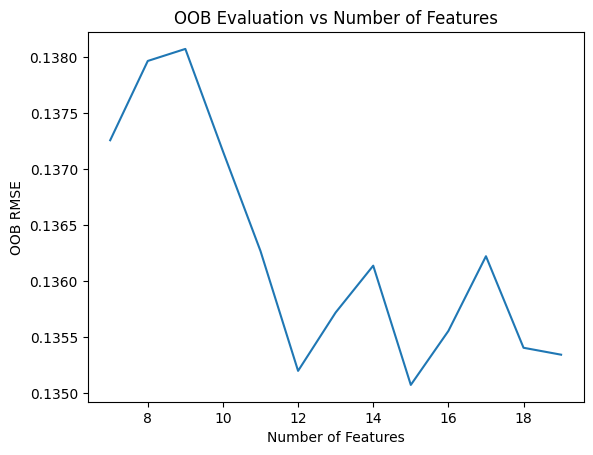

{7: 0.1372574335370617,
 8: 0.13796525025320872,
 9: 0.13807261245560662,
 10: 0.13715935142188768,
 11: 0.1362685989223829,
 12: 0.1351991797428409,
 13: 0.1357201689689391,
 14: 0.13613812733829536,
 15: 0.13507373734893505,
 16: 0.13555534868465474,
 17: 0.13622241004850785,
 18: 0.1354053835334473,
 19: 0.13534355640650064}

In [13]:
import matplotlib.pyplot as plt

x = list(oob_evals.keys())
y = list(oob_evals.values())

plt.plot(x, y)
plt.xlabel("Number of Features")
plt.ylabel("OOB RMSE")
plt.title("OOB Evaluation vs Number of Features")
plt.show()

oob_evals
# we choose the model with 15 features

In [14]:
# fit the model with 15 features
rf_model = tfdf.keras.RandomForestModel(
    task=tfdf.keras.Task.REGRESSION, 
    num_candidate_attributes=15
    )
rf_model.compile(metrics=['mse'])
rf_model.fit(tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label='SalePriceLog', task=tfdf.keras.Task.REGRESSION))


Use /tmp/tmpxck_syfh as temporary training directory
Reading training dataset...
Training dataset read in 0:00:02.433226. Found 1460 examples.
Training model...


I0000 00:00:1726162718.666953     857 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1726162718.667031     857 kernel.cc:775] Collect training examples
I0000 00:00:1726162718.667050     857 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1726162718.667506     857 kernel.cc:394] Number of batches: 2
I0000 00:00:1726162718.667523     857 kernel.cc:395] Number of examples: 1460
I0000 00:00:1726162718.670011     857 data_spec_inference.cc:306] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1726162718.670107     857 data_spec_inference.cc:306] 1 item(s) have been prun

Model trained in 0:00:01.237178
Compiling model...


I0000 00:00:1726162719.876931     857 decision_forest.cc:761] Model loaded with 300 root(s), 138116 node(s), and 76 input feature(s).
I0000 00:00:1726162719.877015     857 abstract_model.cc:1323] Engine "RandomForestOptPred" built
2024-09-12 19:38:39.877042: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model compiled.


In [15]:
# load the test values
test_df = pd.read_csv("resources/test.csv")
test_df.head()

ids = test_df.pop('Id')

# make predictions
predictions_logs = rf_model.predict(tfdf.keras.pd_dataframe_to_tf_dataset(test_df, task = tfdf.keras.Task.REGRESSION))
predictions = np.exp(predictions_logs)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': predictions.squeeze()})

output.head()

2/2 [==============================] - 1s 26ms/step


,Id,SalePrice
0,1461,124970.757812
1,1462,154766.937500
2,1463,180522.390625
3,1464,181509.656250
4,1465,193242.187500


In [16]:
output.to_csv('output.csv', index=False, float_format='%.10f')

The score in the evaluation is 0.1408